In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
checkout= pd.read_csv('homework_checkouts - Sheet1.csv')
checkout.isnull().sum()
# checkout.shape

user_id         0
checkout_id     0
checkout_ts     0
is_approved     0
is_authed       0
loan_amount     0
apr             0
fico_score     11
dtype: int64

In [3]:
checkout['fico_score'].fillna(checkout['fico_score'].mean(), inplace=True)
checkout.isnull().sum()

user_id        0
checkout_id    0
checkout_ts    0
is_approved    0
is_authed      0
loan_amount    0
apr            0
fico_score     0
dtype: int64

In [60]:
email= pd.read_csv("email_list_homework - Sheet1.csv")
email.isnull().sum()
# email.shape

user_id         0
is_returning    0
dtype: int64

In [61]:
service= pd.read_csv('servicing_homework - Sheet1.csv')
service.isnull().sum()
# service.shape

checkout_id      0
contacts         0
is_charge_off    0
dtype: int64

In [62]:
merged_data = pd.merge(checkout, email, on="user_id", how="left")
merged_data = pd.merge(merged_data, service, on="checkout_id", how="left")
merged_data.head()
merged_data.isnull().sum()  # check for missing values
merged_data.shape

(1935, 11)

In [49]:
merged_data['fico_score'].fillna(merged_data['fico_score'].mean(), inplace=True)
merged_data['is_returning'].fillna(merged_data['is_returning'].mode(), inplace=True)
merged_data['contacts'].fillna(merged_data['contacts'].mode(), inplace=True)
merged_data['is_charge_off'].fillna(merged_data['is_charge_off'].mode(), inplace=True)

In [63]:
# Calculate conversion rate for returning vs. new users
conversion_rate_user = merged_data.groupby("user_id")["is_approved"].max().mean()
conversion_rate_authed = merged_data.loc[merged_data["is_approved"] == 1, "is_authed"].mean()

print("User Conversion Rate:",conversion_rate_user)
print("Authed Conversion Rate:",conversion_rate_authed)

User Conversion Rate: 0.8030933967876264
Authed Conversion Rate: 0.8059796437659033


In [53]:
# Calculate revenue from MDR and interest
checkout["revenue"] = 0  # Initialize revenue column

# Calculate revenue from MDR
checkout.loc[checkout["apr"] == "IB", "revenue"] = 0.02 * checkout["loan_amount"]  # MDR for interest-bearing loans
checkout.loc[checkout["apr"] == "Zero", "revenue"] = 0.05 * checkout["loan_amount"]  # MDR for zero-percent loans

# Calculate revenue from interest
checkout.loc[checkout["apr"] == "IB", "revenue"] += 0.05 * checkout["loan_amount"]  # Interest revenue for interest-bearing loans

# Total revenue
total_revenue = checkout["revenue"].sum()

print("Total Revenue: $", total_revenue)

Total Revenue: $ 42902.600000000006


In [64]:
# Calculate total cost for contacts
total_contacts_cost = 30 * merged_data["contacts"].sum()

# Calculate total cost for charge-offs
total_charge_off_cost = merged_data.loc[merged_data["is_charge_off"] == 1, "loan_amount"].sum()

# Calculate total cost for email list acquisition
total_email_list_cost = 35 * len(email)

print("Total Cost for Contacts: ", total_contacts_cost)
print("Total Cost for Charge-offs: ", total_charge_off_cost)
print("Total Cost for Email List Acquisition: ", total_email_list_cost)

Total Cost for Contacts:  9000.0
Total Cost for Charge-offs:  12513
Total Cost for Email List Acquisition:  379085


<Axes: title={'center': 'Conversion Rate Improvement'}>

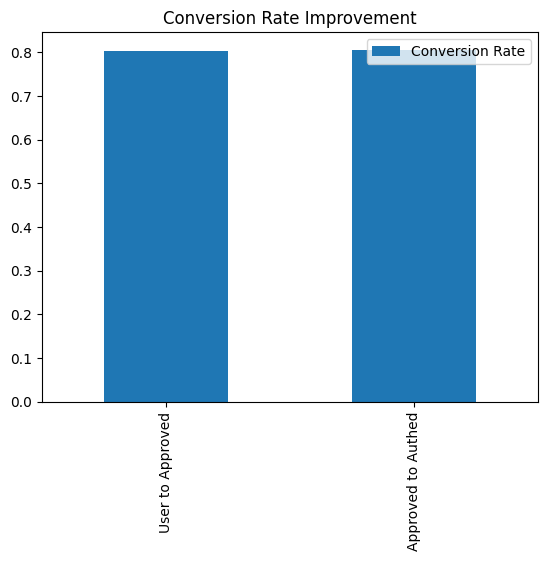

In [57]:
# Create conversion rate bar plot
conversion_rate_slide = pd.DataFrame({
    "Conversion Rate": [conversion_rate_user, conversion_rate_authed]
}, index=["User to Approved", "Approved to Authed"])
conversion_rate_slide.plot(kind="bar", title="Conversion Rate Improvement")

<Axes: title={'center': 'Revenue vs. Costs Analysis'}>

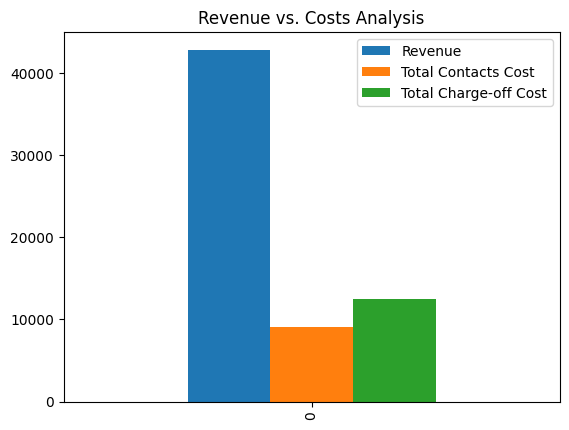

In [58]:
# Revenue and Costs Analysis
revenue_costs_slide = pd.DataFrame({
    "Revenue": [total_revenue],
    "Total Contacts Cost": [total_contacts_cost],
    "Total Charge-off Cost": [total_charge_off_cost]
})
revenue_costs_slide.plot(kind="bar", title="Revenue vs. Costs Analysis")